<a href="https://colab.research.google.com/github/mehdi-raza1/langgraph/blob/main/00_edges_node_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture --no-stderr

%pip install -q -U langgraph

In [ ]:
from typing_extensions import TypedDict

class LearningState(TypedDict):
    prompt:str

In [ ]:
first_state : LearningState = LearningState(prompt="Hello World")

In [ ]:
print(first_state)

print(first_state['prompt'])

print(first_state['prompt'] + ' I AM')

print(first_state)

print(type(first_state))




{'prompt': 'Hello World'}
Hello World
Hello World I AM
{'prompt': 'Hello World'}
<class 'dict'>


In [ ]:
def node_1(state: LearningState):
   print("node1 ======>    state", state)
   return {"prompt":state['prompt']+' I Am'}


def node_2(state: LearningState):
   print("node2 ======>    state", state)
   return {"prompt":state['prompt']+' Happy'}


In [ ]:
from langgraph.graph import StateGraph , START , END
from langgraph.graph.state import CompiledStateGraph

builder: StateGraph = StateGraph(state_schema=LearningState)

In [ ]:
print(type(builder))

<class 'langgraph.graph.state.StateGraph'>


In [ ]:
builder.add_node("node1", node_1)
builder.add_node("node2", node_2)



In [ ]:
builder.add_edge(START, "node1")
builder.add_edge("node1", "node2")
builder.add_edge("node2", END)

In [ ]:
graph: CompiledStateGraph = builder.compile()

In [ ]:
from IPython.display import display,Image

print(graph.get_graph())

# graph.get_graph

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=<class 'langchain_core.utils.pydantic.LangGraphInput'>, metadata=None), 'node1': Node(id='node1', name='node1', data=node1(tags=None, recurse=True, func_accepts_config=False, func_accepts={'writer': False, 'store': False}), metadata=None), 'node2': Node(id='node2', name='node2', data=node2(tags=None, recurse=True, func_accepts_config=False, func_accepts={'writer': False, 'store': False}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=<class 'langchain_core.utils.pydantic.LangGraphOutput'>, metadata=None)}, edges=[Edge(source='__start__', target='node1', data=None, conditional=False), Edge(source='node1', target='node2', data=None, conditional=False), Edge(source='node2', target='__end__', data=None, conditional=False)])


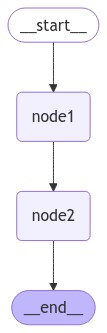

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
graph.invoke({"prompt":"Hi"})

node1 ======>    state {'prompt': 'Hi'}
node2 ======>    state {'prompt': 'Hi I Am'}


{'prompt': 'Hi I Am Happy'}

# **Task**: In Nodes Use LLM == GoogleChatModel in Langchain

In [ ]:
%pip install -q -U langchain
%pip install -q -U langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.5 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
gemini_api_key = userdata.get('GEMINI_API_KEY')



In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm:ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(
    model='gemini-1.5-flash',
    api_key=gemini_api_key

    )

In [ ]:
from langchain_core.messages.ai import AIMessage

ai_message : AIMessage = llm.invoke("hi?")

In [ ]:
print(ai_message)

content='Hi there! How can I help you today? \n' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]} id='run-68befafc-7d7f-4bbc-b7d4-f297ccc112c4-0' usage_metadata={'input_tokens': 3, 'output_tokens': 11, 'total_tokens': 14, 'input_token_details': {'cache_read': 0}}


In [ ]:
print(ai_message.content)
print(type(ai_message))

Hi there! How can I help you today? 

<class 'langchain_core.messages.ai.AIMessage'>


# Using langchain with langgraph

In [ ]:
from typing_extensions import TypedDict

class State(TypedDict):
    prompt:str
    output:str

In [ ]:
def node_1(state: State):
  print("First State ======> ", state)
  prompt = state['prompt']
  result = llm.invoke(prompt)
  return {"output": result.content}

In [ ]:
testing = node_1(State(prompt = "hello from mehdi"))
print(testing)

First State ======>  {'prompt': 'hello from mehdi'}
{'output': "Hello Mehdi! It's nice to hear from you. How can I help you today? \n"}


In [ ]:
from IPython.display import display,Image

from langgraph.graph import StateGraph , START , END
from langgraph.graph.state import CompiledStateGraph

builder: StateGraph = StateGraph(state_schema=State)



In [ ]:

builder.add_node("node1", node_1)
builder.add_edge(START, "node1")
builder.add_edge("node1", END)


graph: CompiledStateGraph = builder.compile()

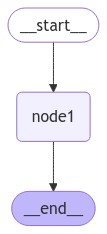

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
result = graph.invoke({"prompt":"What is langchain"})

First State ======>  {'prompt': 'What is langchain'}


In [ ]:
print(result)

{'prompt': 'What is langchain', 'output': "LangChain is a framework for developing applications powered by large language models (LLMs). It essentially acts as a bridge between LLMs and your applications, allowing you to:\n\n**1. Chain together different components:**\n\n* **LLMs:** LangChain integrates with various LLMs like OpenAI's GPT-3, Google's PaLM, and others.\n* **Data Sources:** Connect your applications to various data sources like databases, files, APIs, and even the web.\n* **Other Components:**  Utilize components like text splitters, memory modules, and prompt templates.\n\n**2. Build complex workflows:**\n\n* **Prompt Engineering:**  Craft effective prompts to guide LLMs and get desired responses.\n* **Chain Management:**  Organize and manage chains of different components to achieve specific tasks.\n* **Data Augmentation:**  Use LLMs to enhance data, generate synthetic data, or summarize existing data.\n\n**3. Improve LLM performance:**\n\n* **Contextualization:**  Pro

In [ ]:
import textwrap
from IPython.display import display, Markdown

def to_markdown(text)-> Markdown:
    text : str = text.replace("•", "  *")
    return Markdown(textwrap.indent(text, "> ", predicate=lambda _: True))

In [ ]:
print("Promt : "  , result['prompt'])
to_markdown(result['output'])


Promt :  What is langchain


> LangChain is a framework for developing applications powered by large language models (LLMs). It essentially acts as a bridge between LLMs and your applications, allowing you to:
> 
> **1. Chain together different components:**
> 
> * **LLMs:** LangChain integrates with various LLMs like OpenAI's GPT-3, Google's PaLM, and others.
> * **Data Sources:** Connect your applications to various data sources like databases, files, APIs, and even the web.
> * **Other Components:**  Utilize components like text splitters, memory modules, and prompt templates.
> 
> **2. Build complex workflows:**
> 
> * **Prompt Engineering:**  Craft effective prompts to guide LLMs and get desired responses.
> * **Chain Management:**  Organize and manage chains of different components to achieve specific tasks.
> * **Data Augmentation:**  Use LLMs to enhance data, generate synthetic data, or summarize existing data.
> 
> **3. Improve LLM performance:**
> 
> * **Contextualization:**  Provide LLMs with relevant context from your data sources for better understanding and responses.
> * **Memory:**  Maintain a history of interactions with the LLM to improve conversation flow and accuracy.
> * **Error Handling:**  Implement mechanisms to handle unexpected LLM responses or errors.
> 
> **In essence, LangChain empowers developers to build powerful applications that leverage the capabilities of LLMs in a structured and efficient manner. Here are some examples of what you can do with LangChain:**
> 
> * **Chatbots:** Develop intelligent chatbots that can understand and respond to complex queries.
> * **Summarization and Analysis:**  Summarize large amounts of text, extract key insights, and analyze data.
> * **Code Generation:**  Generate code snippets or entire programs based on natural language instructions.
> * **Creative Writing:**  Collaborate with LLMs to write stories, poems, or other creative content.
> 
> **Key Benefits of LangChain:**
> 
> * **Simplicity:**  Offers a user-friendly interface for building LLM-powered applications.
> * **Flexibility:**  Provides building blocks for various use cases and allows customization.
> * **Efficiency:**  Streamlines LLM integration and reduces development time.
> * **Community Support:**  Has a growing community of developers and resources for assistance.
> 
> If you're interested in exploring the world of LLMs and building innovative applications, LangChain is a powerful tool to consider. 
